In [9]:
import Pkg; 
using LinearAlgebra, ForwardDiff, Plots
using JuliaSimControl
using .SolarInsolationModel

# Dynamic Model

In [ ]:
struct ASV{T<:Real}
    x::T
    
    function ASV()
end

In [ ]:
t_span = 0:0.1:24; # Time in Hours during the day. 12 = noon.

┌ Info: Saved animation to c:\Users\kavin\Documents\Research\CPS\characterizing-ive\solar_insolation.gif
└ @ Plots C:\Users\kavin\.julia\packages\Plots\gzYVM\src\animation.jl:149


Plots.AnimatedGif("c:\\Users\\kavin\\Documents\\Research\\CPS\\characterizing-ive\\solar_insolation.gif")
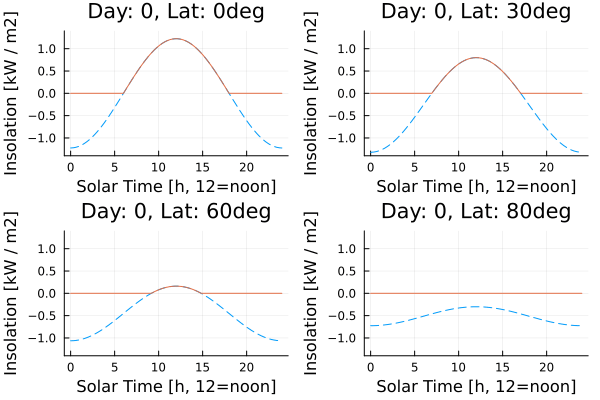

In [12]:
dayGif = @animate for dayOfYear = 0:5:365
    # dayOfYear = 0
        
        plots = [ begin
        plot(solarTime -> SolarInsolationModel.SolarInsolation(dayOfYear, solarTime, lat), 0, 24, linestyle=:dash, label=false)
        plot!(solarTime -> max(0, SolarInsolationModel.SolarInsolation(dayOfYear, solarTime, lat)), 0, 24, label="Day $(dayOfYear), Lat: $(lat) deg")
        xlabel!("Solar Time [h, 12=noon]")
        ylabel!("Insolation [kW / m2]")
        ylims!(-1.4, 1.4)
            title!("Day: $(dayOfYear), Lat: $(lat)deg")  
            plot!(legend=false)
        end for lat in [0, 30, 60, 80] ]
    
    plot(plots...)
    end
    gif(dayGif, "solar_insolation.gif")